## Lab for Module 4 Lesson 1   

In this module , we will cover
- Finding missing values
- treating missing values

**Problem Statement & Data Description**

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answer to different questions asked by company officials.

### Note For this lesson we are introducing the null values in sales_data.csv

In [1]:
#reading the data,libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Use the warning filter context manager to temporarily suppress warnings
warnings.filterwarnings("ignore")

sales = pd.read_csv('sales_data.csv')
cust = pd.read_csv(r'customers.csv',encoding='iso-8859-1')
vend = pd.read_csv(r'vendors.csv')

In [2]:
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005


In [5]:
# Set a seed for reproducibility (optional)
np.random.seed(42)

# Define the proportion of missing values you want to introduce (e.g., 10%)
missing_proportion = 0.12

# Generate a mask of random True/False values based on the missing proportion
mask = np.random.rand(sales.shape[0]) < missing_proportion

# Set the selected values in the "sales" and "profit" columns to NaN
sales.loc[mask, 'sales'] = np.nan

In [6]:
# Set a seed for reproducibility (optional)
np.random.seed(42)

# Define the proportion of missing values you want to introduce (e.g., 10%)
missing_proportion = 0.15

# Generate a mask of random True/False values based on the missing proportion
mask = np.random.rand(sales.shape[0]) < missing_proportion

# Set the selected values in the "sales" and "profit" columns to NaN
sales.loc[mask, 'profit'] = np.nan

### Q.1 Write a code to return a list of columns which have missing values.

In [22]:
# Write your code here
df_na = sales.isna().sum()
df_na[df_na!= 0].index.to_list()

['ship_mode', 'product_name', 'sales', 'profit', 'order_priority']

### Q.2 Calculate missing values(in %) for each dataframe column ,round it up to 2 decimals.

In [26]:
# Write your code here
round(sales.isna().sum()/sales.shape[0]*100,2)

row_id             0.00
order_id           0.00
order_date         0.00
ship_date          0.00
ship_mode          3.06
customer_id        0.00
product_id         0.00
category           0.00
sub_category       0.00
product_name       2.53
sales             12.10
quantity           0.00
discount           0.00
profit            15.03
shipping_cost      0.00
order_priority     2.04
vendor_code        0.00
dtype: float64

### Q3. Fill missing values in 'sales' column by selecting appropriate measure of tendancy (eg:- Mean, median, mode) . Explain why particular method works well than others.

In [29]:
# write your code here
sales['sales'].describe()

count    45086.000000
mean       246.431824
std        481.940435
min          0.444000
25%         30.816000
50%         85.455000
75%        252.463540
max      22638.480000
Name: sales, dtype: float64

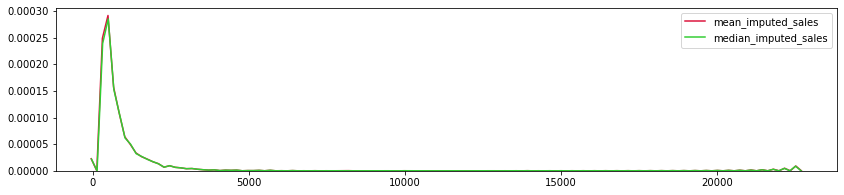

In [33]:
mean_imputed_sales = sales['sales'].fillna(sales['sales'].mean())
median_imputed_sales = sales['sales'].fillna(sales['sales'].median())

fig,axes = plt.subplots(1,1,figsize=(14,3))

sns.kdeplot(data=mean_imputed_sales, color='crimson',label='mean_imputed_sales')
sns.kdeplot(data=median_imputed_sales,color='limegreen',label='median_imputed_sales')

plt.show()

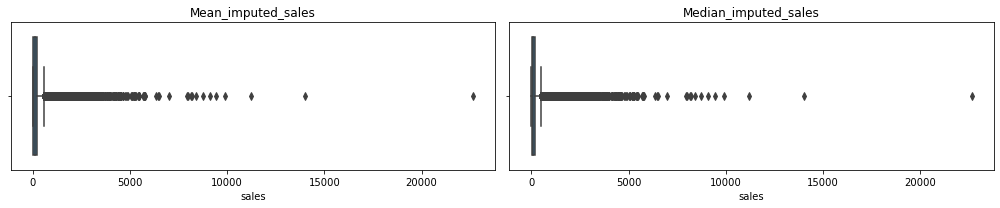

In [36]:
fig, axes = plt.subplots(1,2,figsize=(14, 3))

sns.boxplot(mean_imputed_sales,ax=axes[0])
axes[0].set_title('Mean_imputed_sales')  # Set the title for the first subplot

sns.boxplot(median_imputed_sales,ax=axes[1])
axes[1].set_title('Median_imputed_sales')  # Set the title for the first subplot

plt.tight_layout()
plt.show()

In [37]:
mean_imputed_sales.describe()

count    51290.000000
mean       246.431824
std        451.853121
min          0.444000
25%         36.000000
50%        111.120000
75%        246.431824
max      22638.480000
Name: sales, dtype: float64

In [38]:
median_imputed_sales.describe()

count    51290.000000
mean       226.960188
std        454.891893
min          0.444000
25%         36.000000
50%         85.455000
75%        213.832880
max      22638.480000
Name: sales, dtype: float64

###  Q4. Fill missing values in 'profit' column by selecting appropriate measure of tendancy (eg:- Mean, median, mode) . Explain why particular method works well than others.

In [39]:
# write your code here
sales['profit'].describe()

count    43581.000000
mean        28.190995
std        172.516550
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.900000
max       6719.980800
Name: profit, dtype: float64

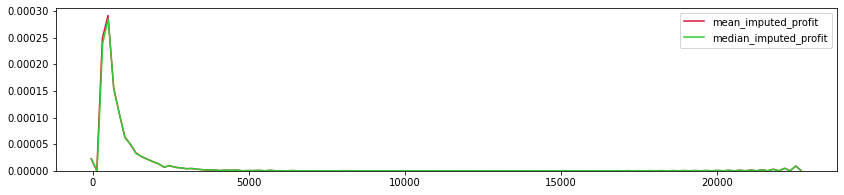

In [40]:
mean_imputed_profit = sales['profit'].fillna(sales['profit'].mean())
median_imputed_profit = sales['profit'].fillna(sales['profit'].median())

fig,axes = plt.subplots(1,1,figsize=(14,3))

sns.kdeplot(data=mean_imputed_sales, color='crimson',label='mean_imputed_profit')
sns.kdeplot(data=median_imputed_sales,color='limegreen',label='median_imputed_profit')

plt.show()

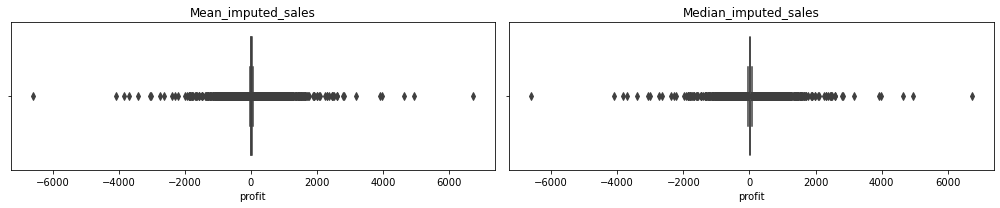

In [41]:
fig, axes = plt.subplots(1,2,figsize=(14, 3))

sns.boxplot(mean_imputed_profit,ax=axes[0])
axes[0].set_title('Mean_imputed_sales')  # Set the title for the first subplot

sns.boxplot(median_imputed_profit,ax=axes[1])
axes[1].set_title('Median_imputed_sales')  # Set the title for the first subplot

plt.tight_layout()
plt.show()



In [42]:
mean_imputed_profit.describe()

count    51290.000000
mean        28.190995
std        159.023849
min      -6599.978000
25%          1.440000
50%         15.030000
75%         28.527000
max       6719.980800
Name: profit, dtype: float64

In [43]:
median_imputed_profit.describe()

count    51290.000000
mean        25.342618
std        159.167998
min      -6599.978000
25%          1.440000
50%          9.240000
75%         28.527000
max       6719.980800
Name: profit, dtype: float64

## Solutions

In [9]:
## Q.1) 
def missing_value_col(data):
    # Approach:-1
    # Using list comprehension
    #col_list=[col for col in data.columns if any(data[col].isna())]
    
    # Approach:- 2
    ### Using for loop
    col_list=[]
    for col in data.columns:
        if any(data[col].isna()):
            col_list.append(col)
    return col_list

missing_value_col(data=sales)

['ship_mode', 'product_name', 'sales', 'profit', 'order_priority']

In [10]:
## Q.2)
def missing_value_every_col(data):
    Total_rows=data.shape[0]
    return round(100*data.isna().sum()/Total_rows,2)
missing_value_every_col(data=sales)

row_id             0.00
order_id           0.00
order_date         0.00
ship_date          0.00
ship_mode          3.06
customer_id        0.00
product_id         0.00
category           0.00
sub_category       0.00
product_name       2.53
sales             12.10
quantity           0.00
discount           0.00
profit            15.03
shipping_cost      0.00
order_priority     2.04
vendor_code        0.00
dtype: float64

In [11]:
## Q.3) 
sales['sales'].describe()

count    45086.000000
mean       246.431824
std        481.940435
min          0.444000
25%         30.816000
50%         85.455000
75%        252.463540
max      22638.480000
Name: sales, dtype: float64

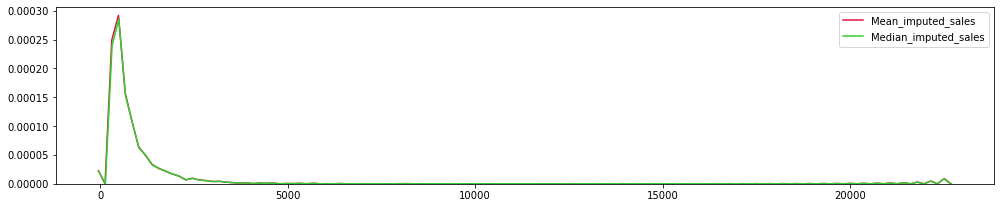

In [14]:
### Continuing Q.3)
# Impute missing values with mean and median
mean_imputed_sales = sales['sales'].fillna(sales['sales'].mean())
median_imputed_sales = sales['sales'].fillna(sales['sales'].median())

fig, axes = plt.subplots(1,1,figsize=(14, 3))

sns.kdeplot(data=mean_imputed_sales,color='crimson', label='Mean_imputed_sales')
sns.kdeplot(data=median_imputed_sales,color='limegreen', label='Median_imputed_sales')

plt.tight_layout()
plt.show()

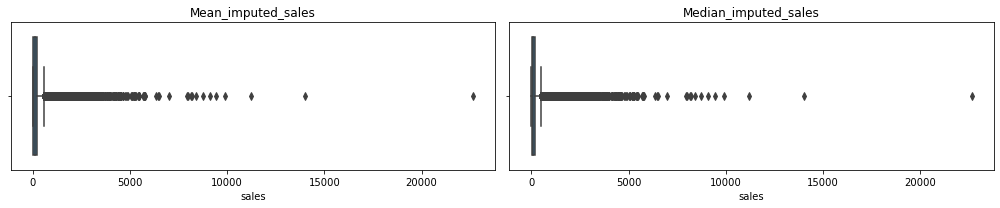

In [15]:
### Continuing Q.3)
fig, axes = plt.subplots(1,2,figsize=(14, 3))

sns.boxplot(mean_imputed_sales,ax=axes[0])
axes[0].set_title('Mean_imputed_sales')  # Set the title for the first subplot

sns.boxplot(median_imputed_sales,ax=axes[1])
axes[1].set_title('Median_imputed_sales')  # Set the title for the first subplot

plt.tight_layout()
plt.show()

In [16]:
mean_imputed_sales.describe()

count    51290.000000
mean       246.431824
std        451.853121
min          0.444000
25%         36.000000
50%        111.120000
75%        246.431824
max      22638.480000
Name: sales, dtype: float64

In [17]:
median_imputed_sales.describe()

count    51290.000000
mean       226.960188
std        454.891893
min          0.444000
25%         36.000000
50%         85.455000
75%        213.832880
max      22638.480000
Name: sales, dtype: float64

We see changes in 50%, mean , std when we are imputing by mean vs when we are imputing by median

* We see that both methods produce different densities.
* In the cases when we are dealing with KPI's like sales ,profits , salary etc which contains extreme outlier using mean imputation might not be the way as mean is impacted by outliers. In such cases using median imputation might turn out to better method of imputation.

In [18]:
# Q.4)
sales['profit'].describe()

count    43581.000000
mean        28.190995
std        172.516550
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.900000
max       6719.980800
Name: profit, dtype: float64

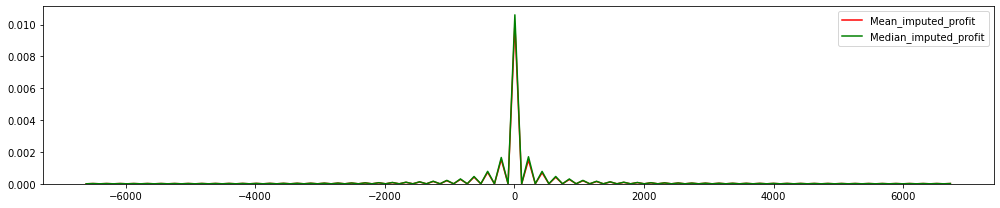

In [25]:
# Impute missing values with mean and median
mean_imputed_profit = sales['profit'].fillna(sales['profit'].mean())
median_imputed_profit = sales['profit'].fillna(sales['profit'].median())

fig, axes = plt.subplots(1,1,figsize=(14, 3))

sns.kdeplot(data=mean_imputed_profit,
            color='red', label='Mean_imputed_profit')
sns.kdeplot(data=median_imputed_profit,
            color='green', label='Median_imputed_profit')

plt.tight_layout()
plt.show()

In [26]:
mean_imputed_profit.describe()

count    51290.000000
mean        28.190995
std        159.023849
min      -6599.978000
25%          1.440000
50%         15.030000
75%         28.527000
max       6719.980800
Name: profit, dtype: float64

In [27]:
median_imputed_profit.describe()

count    51290.000000
mean        25.342618
std        159.167998
min      -6599.978000
25%          1.440000
50%          9.240000
75%         28.527000
max       6719.980800
Name: profit, dtype: float64

We see changes in 50%, mean , std when we are imputing by mean vs when we are imputing by median